In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [67]:
data=pd.read_csv('survey.csv') # OSMI Mental Health in Tech Survey

In [68]:
print(data.columns)
print(data.shape)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
(1259, 27)


In [74]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Cleaning

In [75]:
# looking at data having NaN vales and the percentage of NaN present.
nans = pd.concat([data.isnull().sum(), data.isnull().sum() / data.shape[0]], axis=1, keys=['Train', 'Percentage'])
print(nans[nans.sum(axis=1) > 0])

                Train  Percentage
state             515    0.409055
self_employed      18    0.014297
work_interfere    264    0.209690
comments         1095    0.869738


In [76]:
# removing columns having 90% dublicacy
threshold=90
for i in data.columns:
    for j in data.columns:
        try:
            if ((np.array((data[i]).astype(int)==data[j].astype(int)).sum()/data.shape[0]*100)>threshold) and i!=j:
                data.drop(i,axis=1,inplace=True)
                break
        except ValueError:
            if ((np.array(data[i]==data[j]).sum()/data.shape[0]*100)>threshold) and i!=j:
                data.drop(i,axis=1,inplace=True)
                break

In [77]:
# if 80% or above of the column values are null, drop them.
threshold=80
for i in data.columns:
    if data[i].isnull().sum()>threshold/100*data.shape[0]:
        data.drop(i,axis=1,inplace=True)

In [78]:
# DROPPING CONSTANT COLUMNS
for i in data.columns:
    if data[i].nunique()<=1:
        data.drop(i,axis=1,inplace=True)
    else:
        pass

In [79]:
# removing columns with varince higher than the threshold
threshold=80
for i in data.columns:
    if (data[i].nunique()/data.shape[0]*100 >= threshold):
        data.drop(i,axis=1,inplace=True)

In [80]:
# Adding Emp_ID
data['Emp_ID']=pd.Series(range(1000,(1000+data.shape[0])))

In [81]:
#deleting columns which isn't from the peresective for employees.
data.drop(['Country','state','self_employed','no_employees','care_options','tech_company','obs_consequence'],axis=1,inplace=True)

# Going through columsn for insights

In [82]:
data['Age'].describe().astype(int)

count          1259
mean       79428148
std     -2147483648
min           -1726
25%              27
50%              31
75%              36
max     -2147483648
Name: Age, dtype: int32

In [83]:
# Removing Outliers in Age Attribute
def age_process(age):
    if age>=20 and age<=80:
        return age
    else:
        return np.nan
data['Age'] = data['Age'].apply(age_process) 

In [84]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

Text(0, 0.5, 'Freq')

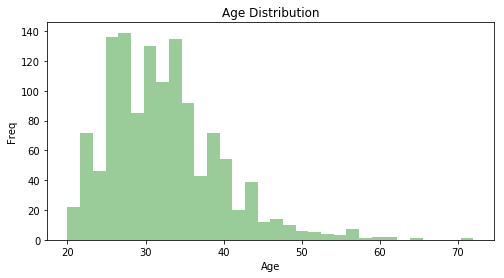

In [85]:
fig,ax = plt.subplots(figsize=(8,4))
sns.distplot(data['Age'].dropna(),ax=ax,kde=False,color='green')
plt.title('Age Distribution')
plt.ylabel('Freq')

In [86]:
# categorising the Gender Attribute into three main section 1. Male 2.Famle 3.Others
print(data['Gender'].describe())
print(data['Gender'].unique())

count     1259
unique      49
top       Male
freq       615
Name: Gender, dtype: object
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [87]:
data['Gender'].replace(['femail','Female (cis)','Female','female','F','Cis Female','Woman','f','queer/she/they','Femake','woman','Female ','cis-female/femme'],'Female',inplace=True)
data['Gender'].replace(['unsure what that really means','ostensibly male','p','A little about you','queer','Female (trans)','Neuter','Trans woman','Trans-female','something kinda male','non-binary','Nah','Enby','Enby','Genderqueer','Androgyne','woman','All','Agender'],'Others',inplace=True)
data['Gender']=data['Gender'].apply(lambda x: 'Male' if (x !='Female') and (x!='Others')  else x)

In [88]:
# all goood with fam history
data['family_history'].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [89]:
# Giving proper structure !!
data=data.reindex(['Emp_ID','Age', 'Gender', 'family_history', 'treatment', 'work_interfere',
       'remote_work', 'benefits', 'wellness_program', 'seek_help', 'anonymity'
       , 'mental_health_consequence', 'phys_health_consequence',
       'coworkers', 'supervisor', 'mental_health_interview',
       'phys_health_interview', 'mental_vs_physical','leave'],axis=1)

In [90]:
data.columns

Index(['Emp_ID', 'Age', 'Gender', 'family_history', 'treatment',
       'work_interfere', 'remote_work', 'benefits', 'wellness_program',
       'seek_help', 'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'leave'],
      dtype='object')

# Importing Cleaned Data-set

In [23]:
data.to_csv('Mental_health_data.csv', index=False)

In [92]:
data['mental_vs_physical'].value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

In [93]:
data.select_dtypes(include=['object']).columns

Index(['Gender', 'family_history', 'treatment', 'work_interfere',
       'remote_work', 'benefits', 'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'leave'],
      dtype='object')

# mapping the Catagorical values.

In [94]:
def mapping(data):
    
    Gender = {}
    Gender['Male'] = 0 
    Gender['Female'] = 1 
    Gender['Others'] = 2 

    data.Gender = data.Gender.map(Gender)
        
    family_history = {}
    family_history['Yes'] = 1
    family_history['No'] = 0
    family_history["Don't know"] = 2
    
    data.family_history = data.family_history.map(family_history)
    data.treatment = data.treatment.map(family_history)
    data.remote_work = data.remote_work.map(family_history)
    data.benefits = data.benefits.map(family_history)
    data.wellness_program = data.wellness_program.map(family_history)
    data.seek_help = data.seek_help.map(family_history)
    data.anonymity = data.anonymity.map(family_history)
    data.mental_vs_physical = data.mental_vs_physical.map(family_history)

    work_interfere = {}
    work_interfere['Sometimes'] = 0
    work_interfere['Never'] = 1
    work_interfere['Rarely'] = 2 
    work_interfere['Often'] = 3

    data.work_interfere = data.work_interfere.map(work_interfere)
    
    mental_health_consequence = {}
    mental_health_consequence['Yes'] = 1 
    mental_health_consequence['No'] = 0 
    mental_health_consequence['Maybe'] = 2 

    data.mental_health_consequence = data.mental_health_consequence.map(mental_health_consequence)
    data.phys_health_consequence = data.phys_health_consequence.map(mental_health_consequence)
    data.mental_health_interview = data.mental_health_interview.map(mental_health_consequence)
    data.phys_health_interview = data.phys_health_interview.map(mental_health_consequence)

    
    coworkers = {}
    coworkers['Yes'] = 1 
    coworkers['No'] = 0 
    coworkers['Some of them'] = 2 

    data.coworkers = data.coworkers.map(coworkers)
    data.supervisor = data.supervisor.map(coworkers)
            
    return data

data = mapping(data)# Calling Function

In [95]:
data['leave'].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [96]:
leave={}
leave['Very difficult']=10
leave['Somewhat difficult']=30
leave["Don't know"]=50
leave['Somewhat easy']=70
leave['Very easy']=90

data['leave'] = data['leave'].map(leave)

In [97]:
data.head()

,Emp_ID,Age,Gender,family_history,treatment,work_interfere,remote_work,benefits,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,leave
0,1000,37.0,1,0,1,3.0,0,1,0,1,1,0,0,2,1,0,2,1,70
1,1001,44.0,0,0,0,2.0,0,2,2,2,2,2,0,0,0,0,0,2,50
2,1002,32.0,0,0,0,2.0,0,0,0,0,2,0,0,1,1,1,1,0,30
3,1003,31.0,0,1,1,3.0,0,0,0,0,0,1,1,2,0,2,2,0,30
4,1004,31.0,0,0,0,1.0,1,1,2,2,2,0,0,2,1,1,1,2,50


# Feature Selection and Engineeirng

In [98]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [99]:
#Threshhold=80%
corr_features = correlation(data, 0.8)
len(set(corr_features))

0

In [100]:
nans = pd.concat([data.isnull().sum(), data.isnull().sum() / data.shape[0]], axis=1, keys=['Train', 'Percentage'])
print(nans[nans.sum(axis=1) > 0])

                Train  Percentage
work_interfere    264     0.20969


In [101]:
# tyring to fill NaN in  work_interfere by grouping it based on  other columns
data[data['work_interfere'].isnull()][['anonymity']].anonymity.value_counts()

2    182
1     74
0      8
Name: anonymity, dtype: int64

In [102]:
data.corr()['leave'].sort_values(ascending=False) # sorted correlation of columns w.r.t to the Target class 'Leave'

leave                        1.000000
mental_vs_physical           0.177323
mental_health_interview      0.166314
supervisor                   0.160002
wellness_program             0.123454
coworkers                    0.110050
seek_help                    0.091328
benefits                     0.089752
remote_work                  0.021699
Emp_ID                       0.011740
work_interfere               0.010450
phys_health_interview       -0.024683
anonymity                   -0.031218
family_history              -0.032909
Age                         -0.042402
Gender                      -0.046922
treatment                   -0.085839
phys_health_consequence     -0.183211
mental_health_consequence   -0.197415
Name: leave, dtype: float64

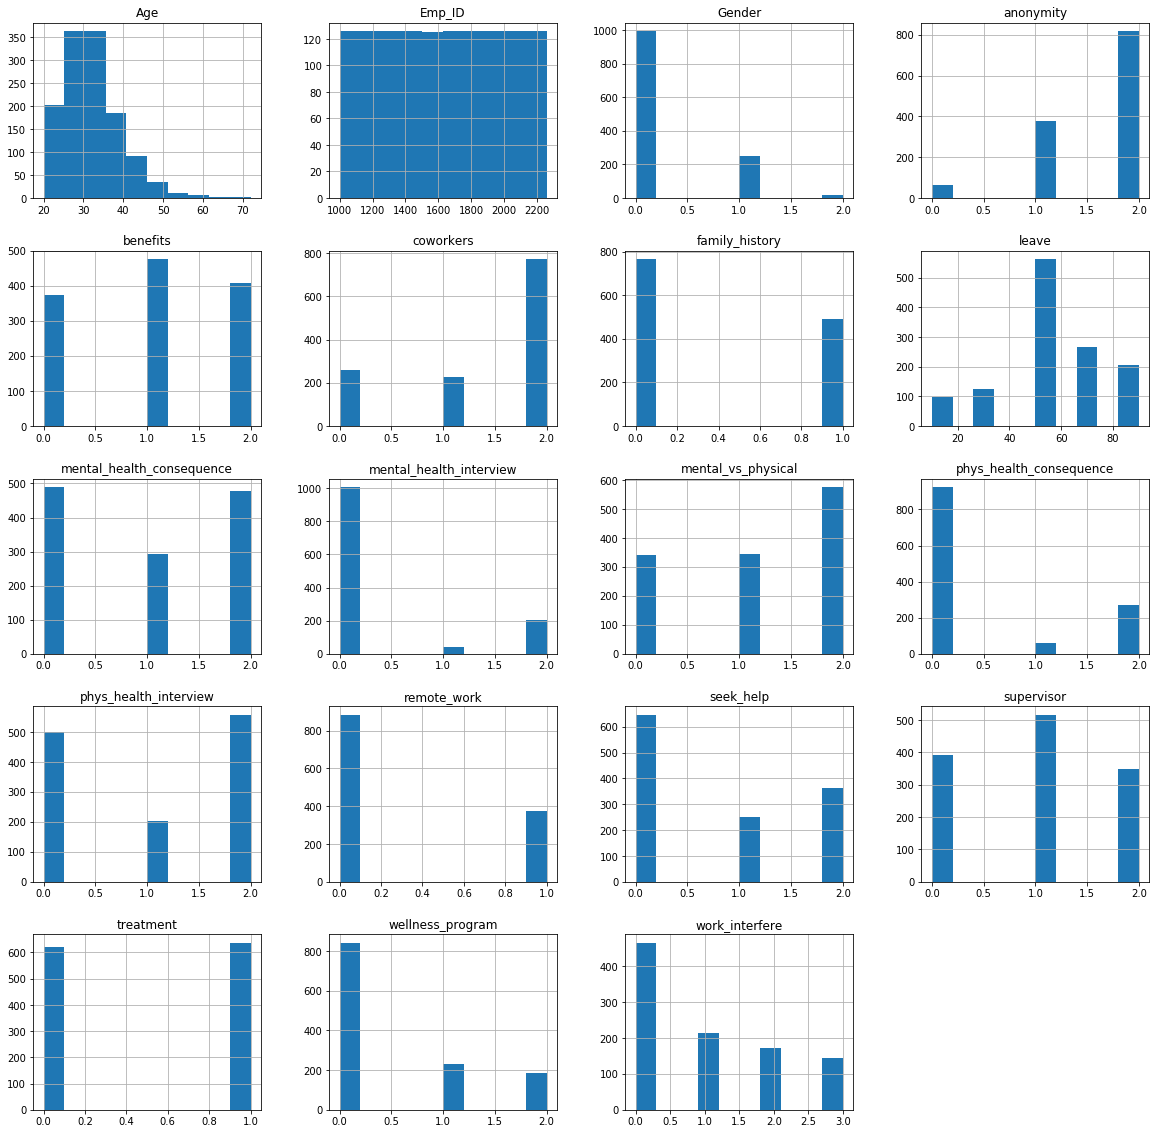

In [36]:
# Distribution
data.hist(figsize=(20,20))
plt.show()

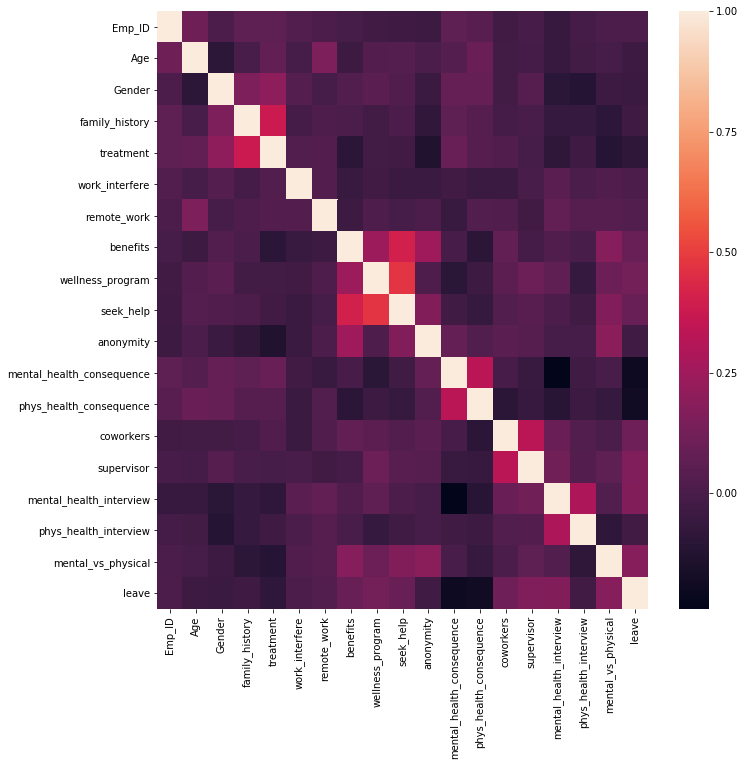

In [37]:
# Heat Map- Visualizing Correlation 
corrmat = data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.177 0.152 0.033 0.039 0.036 0.04  0.054 0.042 0.041 0.053 0.052 0.037
 0.047 0.053 0.029 0.051 0.066]


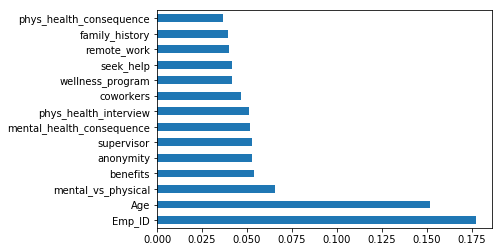

In [103]:
#Feature Selection through RandomForestClassifier

selction=data.drop(['work_interfere'],axis=1)
X=selction.iloc[:,:-1]
Y=selction.iloc[:,-1]
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

# Model Plaining & Development

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [106]:
DX=data.drop(['work_interfere', 'family_history', 'remote_work','phys_health_interview',
             'coworkers', 'supervisor','Emp_ID'],axis=1)
X=DX.iloc[:,:-1]
Y=DX.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0 )

In [107]:
# CV_rfc = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
# CV_rfc.fit(X_train,y_train)
# CV_rfc.best_params_

In [108]:
gnb = RandomForestClassifier(criterion='gini',max_depth=6,max_features='log2',n_estimators=300,random_state=0)
pred = gnb.fit(X_train,y_train).predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

# Metrics
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred).round(3))

[[  4   1  16   0   0]
 [  3   0  19   0   3]
 [  3   0 100   4   4]
 [  0   0  37   5   6]
 [  1   0  17   9  20]]
0.512


In [63]:
# cross validation for better confidence !
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, Y, cv=10)

# Communicating results

In [64]:
print(scores.mean())
print(scores.std())

0.4980032694821487
0.035825513818997075


In [92]:
#LEARNING CURVES to visualize variance and Biasing in the model
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, scoring='r2',obj_line=None,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):
    from sklearn.model_selection import learning_curve
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

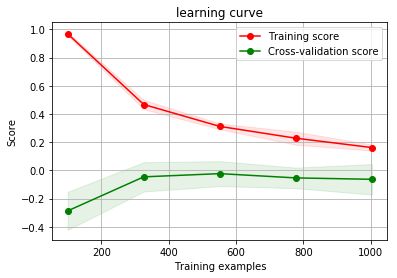

In [93]:
plot_learning_curve(gnb,'learning curve',X,Y)

# Model Deployment

In [94]:
# Deploying Model as joblib file!
from sklearn.externals import joblib

joblib.dump(gnb,'TekSys.joblib')

['TekSys.joblib']